## Macro data exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm # HP filter and OLS regression
import datetime

In [2]:
plt.rcParams['figure.figsize'] = [16, 8]
plt.rcParams['font.size'] = 22
plt.rcParams['lines.linewidth'] = 2.5

### Import Penn World tables

In [3]:
path="/Users/aauclert/Dropbox/Data/Macrodata/pwtraw/"

#pwt_xls = pd.read_excel(path + 'pwt100.xlsx')
pwt = pd.read_stata(path + 'pwt100.dta')    
   
# Get labels of variables
pwt_labels = pd.io.stata.StataReader(path + 'pwt100.dta').variable_labels()

In [4]:
pwt.describe()

,year,rgdpe,rgdpo,pop,emp,avh,hc,ccon,cda,cgdpe,...,csh_x,csh_m,csh_r,pl_c,pl_i,pl_g,pl_x,pl_m,pl_n,pl_k
count,12810.000000,1.039900e+04,1.039900e+04,10399.000000,9529.000000,3492.000000,8637.000000,1.039900e+04,1.039900e+04,1.039900e+04,...,10399.000000,10399.000000,10399.000000,10399.000000,10399.000000,10399.000000,10399.000000,10399.000000,10314.000000,7095.000000
mean,1984.500000,3.048524e+05,3.070802e+05,30.962982,14.171157,1986.923200,2.087195,2.249462e+05,3.049462e+05,3.061396e+05,...,0.229316,-0.300829,0.017791,0.370851,0.423963,0.345635,0.409820,0.403422,0.359019,1.333924
std,20.205986,1.214332e+06,1.218456e+06,116.189454,58.056919,284.003338,0.727413,8.882338e+05,1.236095e+06,1.226055e+06,...,0.266793,0.640212,0.216197,0.424091,0.635707,0.408015,0.196283,0.202566,0.435651,1.941818
min,1950.000000,2.036377e+01,2.765232e+01,0.004425,0.001200,1380.607643,1.007038,1.604856e+01,2.176663e+01,2.026185e+01,...,-1.937363,-23.237627,-12.568965,0.015589,0.006002,0.009270,0.007354,0.020806,0.012977,0.064378
25%,1967.000000,6.801782e+03,7.191773e+03,1.579663,0.775101,1788.478805,1.450483,5.892980e+03,7.194495e+03,6.689781e+03,...,0.067027,-0.379584,-0.025204,0.171226,0.191958,0.116110,0.237652,0.240777,0.164152,0.650608
50%,1984.500000,3.031913e+04,3.084435e+04,6.150688,2.856044,1972.355973,1.987572,2.465417e+04,3.134864e+04,3.031841e+04,...,0.140116,-0.200254,0.000326,0.306258,0.377943,0.244554,0.443856,0.452949,0.295862,0.954343
75%,2002.000000,1.559740e+05,1.587386e+05,19.934229,8.266107,2168.035042,2.674011,1.133967e+05,1.532297e+05,1.559242e+05,...,0.300332,-0.102694,0.044529,0.484549,0.557087,0.452951,0.557034,0.541063,0.447566,1.415062
max,2019.000000,2.086051e+07,2.059584e+07,1433.783686,799.306641,3039.794005,4.351568,1.682624e+07,2.138355e+07,2.079136e+07,...,3.523480,32.874020,7.598285,23.122841,34.444988,18.420809,2.056070,4.990355,20.649197,31.931993


In [5]:
pwt_labels

{'countrycode': '3-letter ISO country code',
 'country': 'Country name',
 'currency_unit': 'Currency unit',
 'year': 'Year',
 'rgdpe': 'Expenditure-side real GDP at chained PPPs (in mil. 2017US$)',
 'rgdpo': 'Output-side real GDP at chained PPPs (in mil. 2017US$)',
 'pop': 'Population (in millions)',
 'emp': 'Number of persons engaged (in millions)',
 'avh': 'Average annual hours worked by persons engaged (source: The Conference Board)',
 'hc': 'Human capital index, see note hc',
 'ccon': 'Real consumption of households and government, at current PPPs (in mil. 2017US$)',
 'cda': 'Real domestic absorption, see note cda',
 'cgdpe': 'Expenditure-side real GDP at current PPPs (in mil. 2017US$)',
 'cgdpo': 'Output-side real GDP at current PPPs (in mil. 2017US$)',
 'cn': 'Capital stock at current PPPs (in mil. 2017US$)',
 'ck': 'Capital services levels at current PPPs (USA=1)',
 'ctfp': 'TFP level at current PPPs (USA=1)',
 'cwtfp': 'Welfare-relevant TFP levels at current PPPs (USA=1)',
 'rg

List countries in order of real GDP at current exchange rates

In [6]:
#pwt['cgdpe']
latest=pwt.loc[pwt['year']==2019]

In [7]:
latest

,countrycode,country,currency_unit,year,rgdpe,rgdpo,pop,emp,avh,hc,...,csh_x,csh_m,csh_r,pl_c,pl_i,pl_g,pl_x,pl_m,pl_n,pl_k
69,ABW,Aruba,Aruban Guilder,2019,3921.261230,3467.299561,0.106314,0.047601,NaN,NaN,...,0.973115,-1.091808,2.125691e-07,0.883092,0.815759,0.744329,0.707260,0.622660,0.813961,0.616658
139,AGO,Angola,Kwanza,2019,228151.015625,227855.718750,31.825295,16.644962,NaN,1.481984,...,0.344351,-0.113983,-1.204703e-01,0.438169,0.342872,0.240024,0.476486,0.611627,0.209101,0.378172
209,AIA,Anguilla,East Caribbean Dollar,2019,376.634979,225.680527,0.014869,NaN,NaN,NaN,...,1.480300,-2.445801,-1.433542e-01,1.064513,1.029199,0.732212,0.768944,0.602734,0.902942,NaN
279,ALB,Albania,Lek,2019,35890.019531,36103.042969,2.880917,1.075898,NaN,2.964992,...,0.126594,-0.313949,6.114468e-02,0.473077,0.456882,0.235589,0.629832,0.525463,0.299344,NaN
349,ARE,United Arab Emirates,UAE Dirham,2019,681525.812500,645956.250000,9.770529,5.808834,NaN,2.746695,...,0.889652,-0.701231,-4.849206e-07,0.725061,0.480580,0.692488,0.688882,0.647336,0.268754,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12529,VNM,Viet Nam,Dong,2019,750726.750000,724123.375000,96.462106,50.399563,2131.968232,2.869998,...,0.526032,-0.518066,-5.730492e-02,0.347591,0.399158,0.245056,0.695617,0.676502,0.249071,NaN
12599,YEM,Yemen,Yemeni Rial,2019,50052.933594,51828.058594,29.161922,5.531877,NaN,1.842989,...,0.000723,-0.135297,-1.733917e-01,0.777612,0.238807,0.211786,0.632594,0.670528,0.171695,NaN
12669,ZAF,South Africa,Rand,2019,748940.000000,734094.375000,58.558270,18.642710,2191.363362,2.908202,...,0.184207,-0.198112,4.914912e-03,0.463660,0.523813,0.447869,0.660216,0.604546,0.312701,0.515316
12739,ZMB,Zambia,Kwacha,2019,57956.183594,56783.714844,17.861030,5.225448,NaN,2.686845,...,0.215397,-0.238961,2.839118e-02,0.373077,0.482041,0.330470,0.574416,0.531915,0.296795,0.342500


Distribution of log GDP in 2018

Text(0.5, 1.0, 'Real GDP at current PPPs')

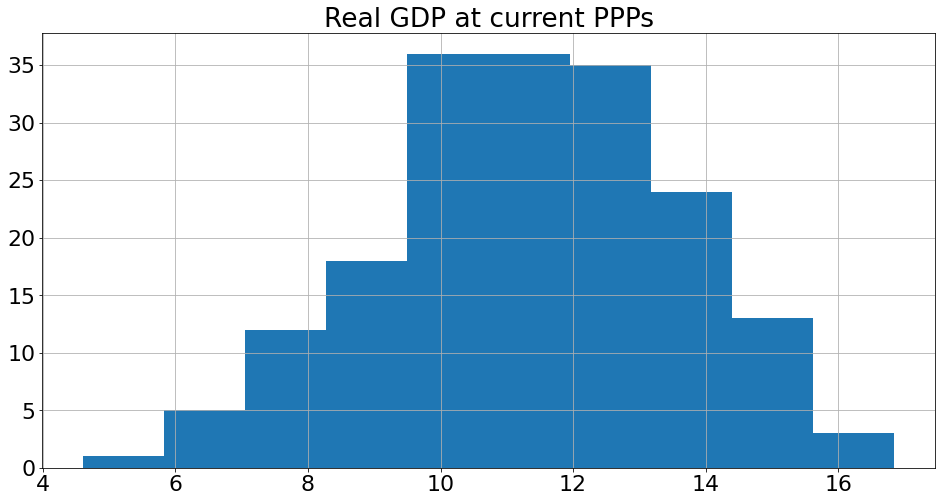

In [8]:
np.log(latest['cgdpe']).hist()
plt.title('Real GDP at current PPPs')

Text(0.5, 1.0, 'Real GDP at national prices')

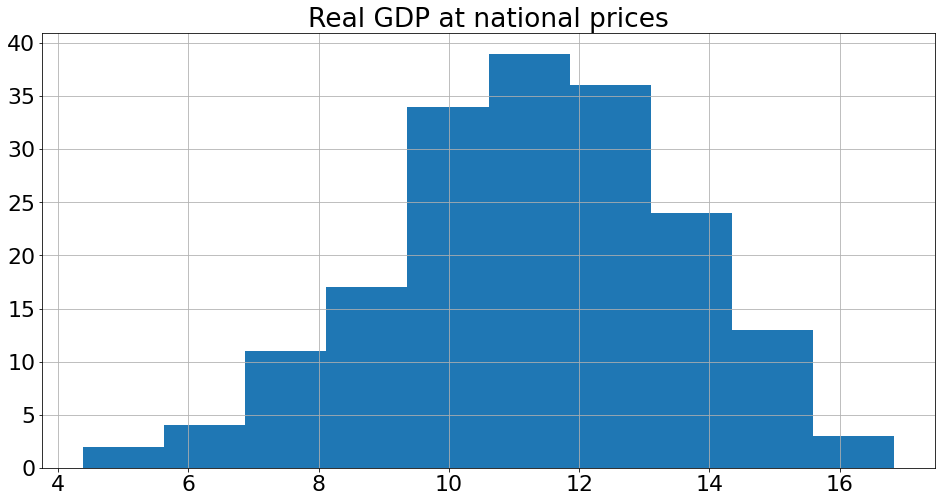

In [9]:
np.log(latest['rgdpna']).hist()
plt.title('Real GDP at national prices')

### At PPP prices

In [10]:
latest['cgdpe'].sum()

125030080.0

Share of world GDP

In [11]:
latest['cgdpe_sh']=100*latest['cgdpe']/(latest['cgdpe'].sum())

<ipython-input-11-8c08dd8e5b98>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  latest['cgdpe_sh']=100*latest['cgdpe']/(latest['cgdpe'].sum())


In [12]:
latest['cgdpe_sh'].sum()

100.000015

In [13]:
latest.sort_values(by=['cgdpe_sh'],ascending=False,inplace=True)

<ipython-input-13-9eae3a29f86f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  latest.sort_values(by=['cgdpe_sh'],ascending=False,inplace=True)


In [14]:
latest['cgdpe_csh']=latest['cgdpe_sh'].cumsum()

<ipython-input-14-bb9a19d8ca9e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  latest['cgdpe_csh']=latest['cgdpe_sh'].cumsum()


In [15]:
latest[['countrycode','country','cgdpe_sh','cgdpe_csh']].head(n=10)

,countrycode,country,cgdpe_sh,cgdpe_csh
12179,USA,United States,16.629089,16.629089
2379,CHN,China,15.931378,32.560467
5529,IND,India,7.118549,39.679016
6159,JPN,Japan,4.011856,43.690872
3289,DEU,Germany,3.437486,47.128357
9939,RUS,Russian Federation,3.355614,50.483971
4339,GBR,United Kingdom,2.487797,52.971767
5459,IDN,Indonesia,2.469287,55.441055
1749,BRA,Brazil,2.467174,57.908230
4199,FRA,France,2.407600,60.315830


### At constant prices

In [16]:
latest['rgdpna'].sum()

125254930.0

Share of world GDP

In [17]:
latest['rgdpna_sh']=100*latest['rgdpna']/(latest['rgdpna'].sum())

<ipython-input-17-f02815fb6dee>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  latest['rgdpna_sh']=100*latest['rgdpna']/(latest['rgdpna'].sum())


In [18]:
latest['rgdpna_sh'].sum()

100.0

In [19]:
latest.sort_values(by=['rgdpna_sh'],ascending=False,inplace=True)

<ipython-input-19-19b3ce1bd8f1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  latest.sort_values(by=['rgdpna_sh'],ascending=False,inplace=True)


In [20]:
latest['rgdpna_csh']=latest['rgdpna_sh'].cumsum()

<ipython-input-20-648f451b19c2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  latest['rgdpna_csh']=latest['rgdpna_sh'].cumsum()


In [21]:
latest[['countrycode','country','rgdpna_sh','rgdpna_csh']].head(n=10)

,countrycode,country,rgdpna_sh,rgdpna_csh
2379,CHN,China,16.424587,16.424587
12179,USA,United States,16.417391,32.841980
5529,IND,India,7.315522,40.157501
6159,JPN,Japan,4.071101,44.228603
3289,DEU,Germany,3.444230,47.672832
9939,RUS,Russian Federation,3.235150,50.907982
5459,IDN,Indonesia,2.483311,53.391293
1749,BRA,Brazil,2.428742,55.820034
4339,GBR,United Kingdom,2.408444,58.228477
4199,FRA,France,2.367443,60.595921
